In [1]:
%matplotlib inline
import numpy as np
from plantcv import plantcv as pcv
from matplotlib import pyplot as plt

In [2]:
pcv.params.debug = "plot"
pcv.params.text_size=5
pcv.params.text_thickness=10
pcv.params.line_thickness = 10

In [3]:
def plot_color_channels(img):
    # List of colormaps
    colors = ["Blues", "Greens", "Reds"]
    # Create a new figure with 3 subplots
    figure, plots = plt.subplots(ncols=3, nrows=1, constrained_layout=True)
    # iterate over each subplot
    for i, subplot in zip(range(3), plots):
        # Plot the ith image color channel with the ith colormap
        subplot.imshow(img[:, :, i], cmap=colors[i])
        # Turn off the coordinates
        subplot.set_axis_off()
    # Show the image
    plt.show()

## Help:
- PlantCV - https://plantcv.readthedocs.io/en/stable/
- NumPy - https://numpy.org/doc/stable/

# What is an image?
We will open an image and explore the components of it.

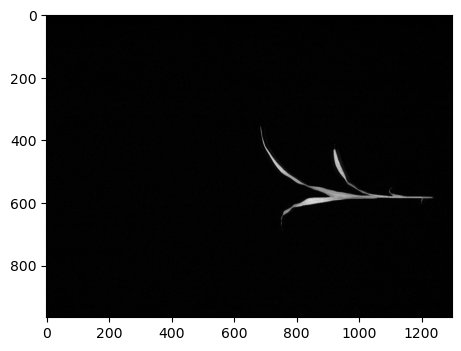

In [4]:
# Read in the image fmax.png
gray_img, graypath, grayname = pcv.readimage(filename="images/fmax.png")

In [5]:
# Show what is in the second and third outputs from pcv.readimage
print(graypath)
print(grayname)

images
fmax.png


# What are some things we notice about the image?

* The image is composed of small square elements, or pixels
* The pixel coordinate system origin is in the top left
* The coordinate system is left-handed, coordinate values increase down and right
* The image is composed of gray values (no color)

![2D gird](./figures/grid2D.png)

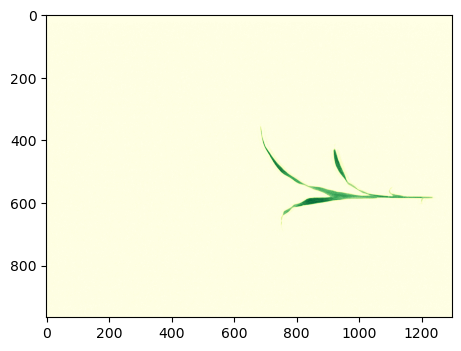

In [6]:
# Plot the image using a different colormap, some options: 'YlGn', 'viridis', 'magma', 'Oranges', 'RdPu'
pcv.plot_image(img=gray_img, cmap='YlGn')

# How are images represented in Python?

In [7]:
# Use the Python type function to determine the data type of the image
type(gray_img)

numpy.ndarray

# Most common Python image analysis packages store images as NumPy arrays
[NumPy](https://numpy.org/) is a core package of the scientific Python community.

We can use NumPy to determine the shape and size of the image. The dimensions are in the order y (rows), x (columns), z (channels) for images.

We can also determine what type of data is stored in each pixel (dtype).

In [8]:
# Print the image data
gray_img

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0, 240,   0, ...,   0,   0,   0],
       [  0,  90,   0, ..., 111,   0,   0],
       [  0,  22, 134, ..., 284,   0, 136]], dtype=uint16)

In [9]:
# Determine the shape and size of the image
gray_img.shape

(966, 1296)

In [10]:
# Determine the data type of the image
gray_img.dtype

dtype('uint16')

# Common image data types

The data type tells how the pixel values are encoded and how many bits they require. 

It is usefull because it determines the range of values a pixel can take. 

Unsigned integers (uint) are commonly used:
- uint8 = 8-bit (2^8 = 256 possible values. Darkest value = 0, brightest = 255)
- uint16 = 16-bit (2^16 = 65,536 possible values. Darkest value = 0, brightest = 65,535)

In [11]:
# Calculate the minimum value observed in gray_img
np.min(gray_img)

0

In [12]:
# Calculate the maximum value observed in gray_img
np.max(gray_img)

7084

# Indexing and slicing
Help us to select portions of an array.


In [13]:
# Show the value of the pixel in row 580 and column 940 
gray_img[580,940]

3935

The basic slice syntax is _i:j_ where _i_ is the starting index and _j_ is the stopping index

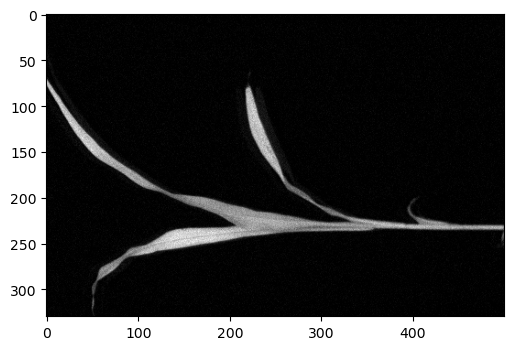

In [14]:
# Create a new image by cropping around the plant part and display it
gray_img_crop = gray_img[350:680,700:1200]
pcv.plot_image(gray_img_crop)

* If _i_ is not given it defaults to 0. 
* If _j_ is not given it defaults to the last value.
* : means select all indices along this axis.

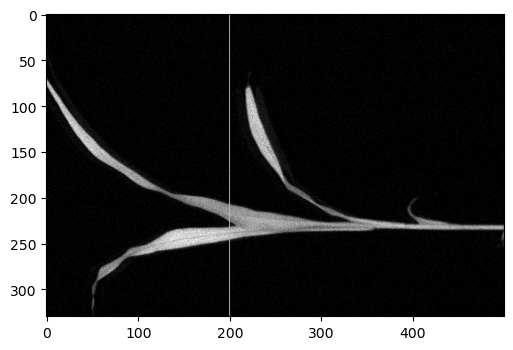

In [15]:
# Change the pixels in a full column of the cropped image to an arbitrary value
gray_img_crop[:,200] = 5000
pcv.plot_image(gray_img_crop)

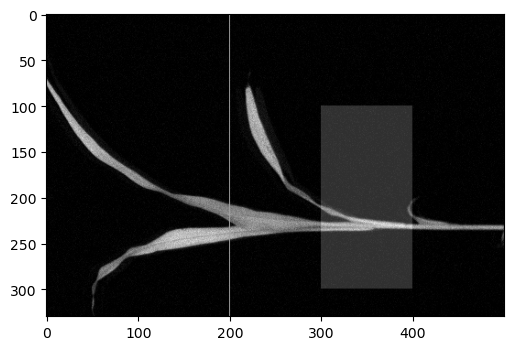

In [16]:
# Add a constant value to a part of the image
gray_img_crop[100:300,300:400] = gray_img_crop[100:300,300:400] + 1500
pcv.plot_image(gray_img_crop)

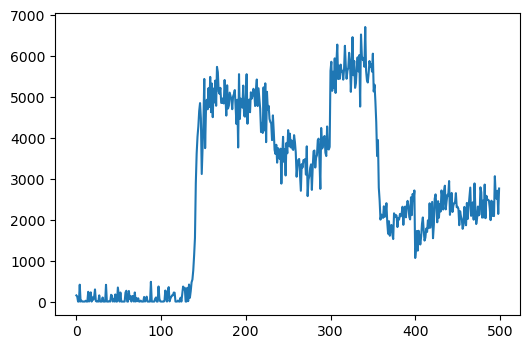

In [17]:
# Extract a full line and make a linear plot
gray_img_line = gray_img_crop[235,:]
fig = plt.figure()
plt.plot(gray_img_line)

# Histogram
Histograms show how the pixels in an image are distributed across the range of values

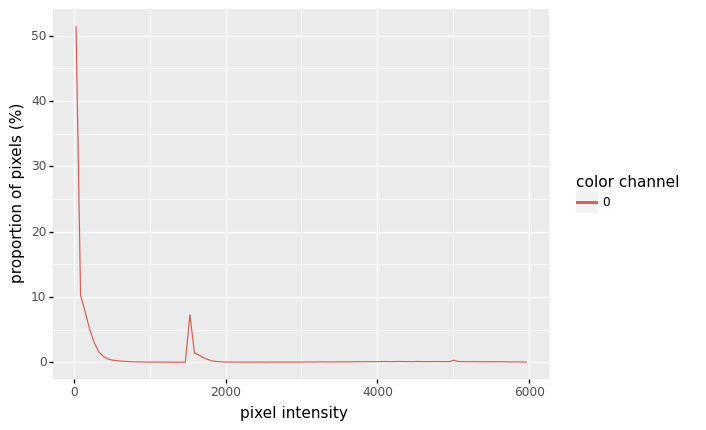

In [18]:
# Plot a histogram of the pixel intensity values
hist = pcv.visualize.histogram(img=gray_img_crop, bins=100, lower_bound=0, upper_bound=6000)

# RGB images
This is a color image encoded using a Red Green Blue (RGB) color model.
Note that in OpenCV the color order is BGR.

![3D gird](./figures/grid3D.png)

The color channels are stacked in a third dimension and increase from the 'front' to the 'back'

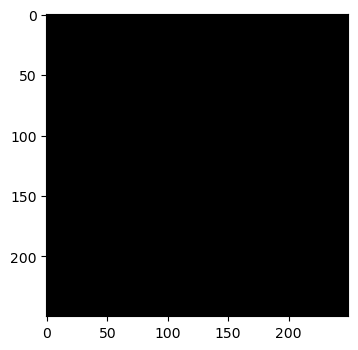

In [19]:
# Create a constant color image:
# Initialization with all values to zero
my_rgb_img = np.zeros((250,250,3), dtype=np.uint8)
pcv.plot_image(my_rgb_img)

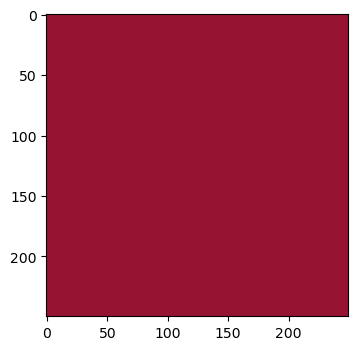

In [20]:
# Create a color image:
# Give a value to each color channel
my_rgb_img[:,:,0] = 50
my_rgb_img[:,:,1] = 20
my_rgb_img[:,:,2] = 150
pcv.plot_image(my_rgb_img)

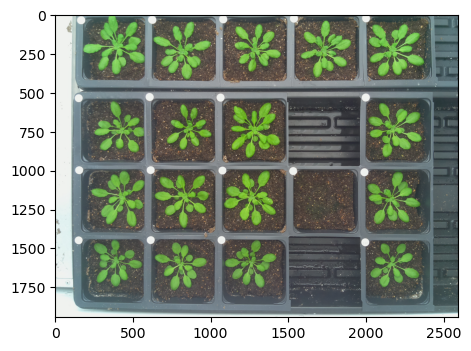

In [21]:
# Read a color image into the program
rgb_img, filepath, filename = pcv.readimage(filename="images/2017-02-28_1500_ch129-pos01.jpg")

In [22]:
# Determine the shape and size of the image
rgb_img.shape

(1944, 2592, 3)

In [23]:
# Determine the data type of the image
rgb_img.dtype

dtype('uint8')

In [24]:
# Calculate the minimum value observed in rgb_img
np.min(rgb_img)

0

In [25]:
# Calculate the maximum value observed in rgb_img
np.max(rgb_img)

255

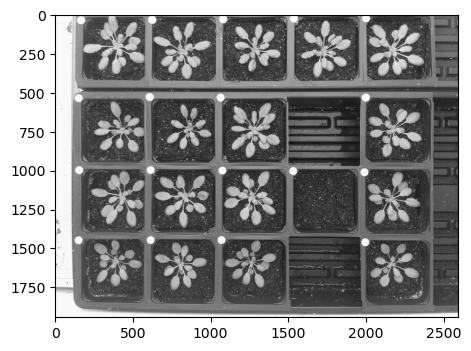

In [26]:
# Subset the green color channel
pcv.plot_image(img=rgb_img[:,:,1])

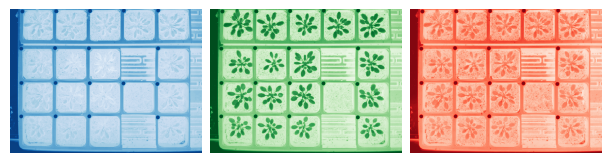

In [27]:
# Plot all three color channels
plot_color_channels(rgb_img)

In [28]:
# Calculate the min, max, and mean values in the green color channel
print(np.min(rgb_img[:,:,1]))
print(np.max(rgb_img[:,:,1]))
print(np.mean(rgb_img[:,:,1]))

23
249
115.06623458377788


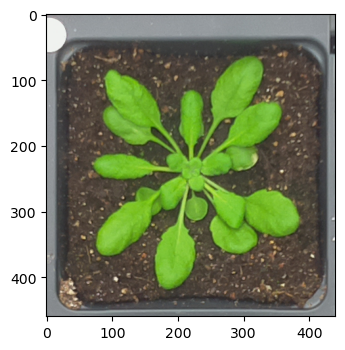

In [29]:
# crop the rgb_img to obtain a single plant
img = rgb_img[500:960, 1060:1500]
pcv.plot_image(img)

In [30]:
# Print dimensions of subset image
np.shape(img)

(460, 440, 3)

In [31]:
# Save the cropped image
pcv.print_image(img, "cropped_plant.png")